## House Price Prediction
#### Handling the imports

In [95]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import pickle

#### Loading the data using pandas

In [2]:
price_df= pd.read_csv('bengaluru_house_prices.csv')

In [3]:
price_df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


#### Descriptive analysis

In [4]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
price_df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


##### The column society has too many null values, its better to drop society

#### Statistic Analysis

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64


C:\Users\rubal\AppData\Local\Temp\ipykernel_23484\3990956682.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_df['price'],  color='g', bins=100, hist_kws={'alpha': 0.4});


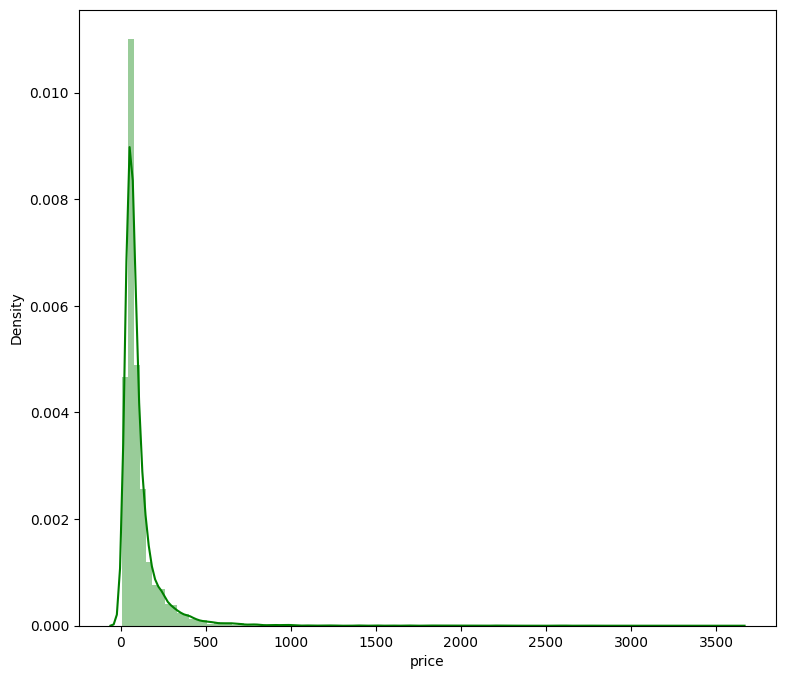

In [6]:
print(price_df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(price_df['price'],  color='g', bins=100, hist_kws={'alpha': 0.4});

##### With this information, we can see the prices are skewed towards right as some price goes ower 3500

#### Data Cleaning

- Droping the columns society( Too much null values)
- Convert total_sqft and size into numerical values

In [7]:
price_df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [8]:
def clean_size_attribute(x):
    if pd.isna(x):
        return np.nan
    
    x1, x2= map(str, x.split())

    return int(x1)

In [9]:
price_df['size_bhk']= price_df['size'].apply(clean_size_attribute)

In [10]:
np.set_printoptions(threshold=np.inf)

In [11]:
arr = price_df['total_sqft'].unique()

In [12]:
arr

array(['1056', '2600', '1440', '1521', '1200', '1170', '2732', '3300',
       '1310', '1020', '1800', '2785', '1000', '1100', '2250', '1175',
       '1180', '1540', '2770', '600', '1755', '2800', '1767', '510',
       '1250', '660', '1610', '1151', '1025', '2100 - 2850', '1075',
       '1760', '1693', '1925', '700', '1070', '1724', '1290', '1143',
       '1296', '1254', '1330.74', '970', '1459', '800', '869', '1270',
       '1670', '2010', '1185', '1600', '3010 - 3410', '1500', '1407',
       '840', '4395', '845', '5700', '1160', '3000', '1140', '1220',
       '1350', '1005', '500', '1358', '1569', '1240', '2089', '1206',
       '1150', '2511', '460', '4400', '1660', '2957 - 3450', '1326',
       '1325', '1499', '1665', '708', '1060', '710', '1450', '2894',
       '1330', '2502', '650', '2400', '1007', '966', '1630', '1640',
       '782', '1260', '1413', '1116', '1530', '3700', '2497', '1436',
       '276', '1427', '2061', '3067 - 8156', '2650', '1282', '1050',
       '945', '950', '18

In [13]:
def clean_total_sqft(x):
    tokens = x.split('-')

    if len(tokens) == 2:
        try:
            return (float(tokens[0]) + float(tokens[1])) / 2.0
        except ValueError:
            return np.NAN 
    else:
        x = x.strip()
        try:
            return float(x)
        except ValueError:
            return np.NAN

In [14]:
price_df['total_sqft_updated']= price_df['total_sqft'].apply(clean_total_sqft)

In [15]:
price_df.drop(['total_sqft', 'size', 'availability', 'society'], axis= 'columns', inplace= True)

In [16]:
price_df.dropna(inplace= True)

In [17]:
price_df.head()

,area_type,location,bath,balcony,price,size_bhk,total_sqft_updated
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2.0,1200.0


##### Let's look at the distribution of numerical attributes

In [18]:
numerical_column_list= [col for col in price_df.columns if price_df[col].dtype== 'int' or price_df[col].dtype== 'float']

In [19]:
price_df_num= price_df[numerical_column_list]
price_df_num.head()

,bath,balcony,price,size_bhk,total_sqft_updated
0,2.0,1.0,39.07,2.0,1056.0
1,5.0,3.0,120.00,4.0,2600.0
2,2.0,3.0,62.00,3.0,1440.0
3,3.0,1.0,95.00,3.0,1521.0
4,2.0,1.0,51.00,2.0,1200.0


array([[<Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'balcony'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'size_bhk'}>],
       [<Axes: title={'center': 'total_sqft_updated'}>, <Axes: >]],
      dtype=object)

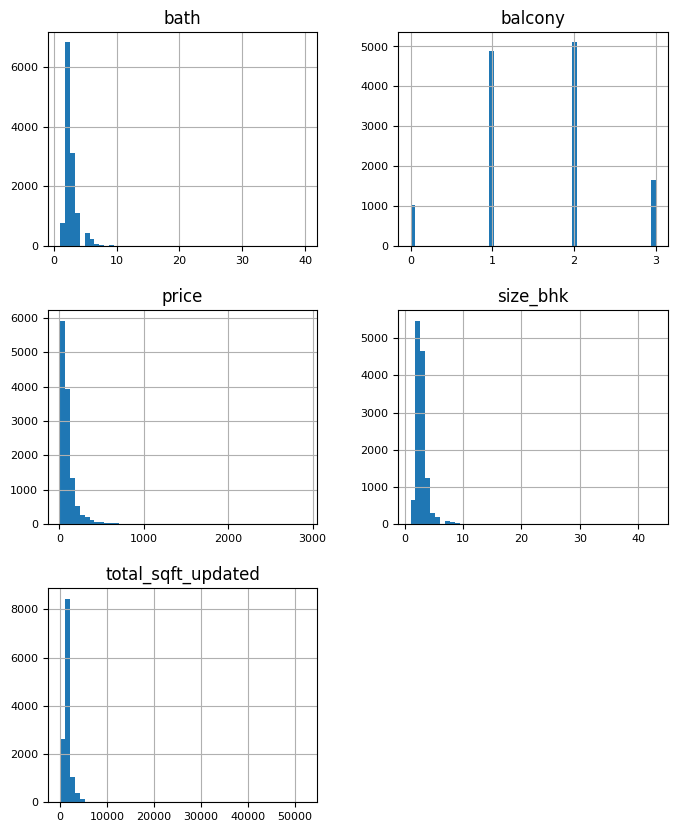

In [20]:
price_df_num.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8)

In [21]:
price_df_num.describe()

,bath,balcony,price,size_bhk,total_sqft_updated
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000
mean,2.616277,1.585649,105.952648,2.736422,1511.835167
std,1.223882,0.816758,131.813137,1.202643,1162.097276
min,1.000000,0.000000,8.000000,1.000000,5.000000
25%,2.000000,1.000000,49.015000,2.000000,1100.000000
50%,2.000000,2.000000,70.000000,3.000000,1260.000000
75%,3.000000,2.000000,115.000000,3.000000,1640.000000
max,40.000000,3.000000,2912.000000,43.000000,52272.000000


##### From the above, we can conclude there are outlier,
- Will be identifying the outliers based on z-scores
- however, it will not be wise to calculate z-scores based on all the numerical data
- so, I choosed to go with z_score of price_per_sq

In [27]:
price_df['price_per_sqft']= (price_df['price']*100)/price_df['total_sqft_updated']

In [28]:
price_df.head(3)

,area_type,location,bath,balcony,price,size_bhk,total_sqft_updated,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0,3.699811
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0,4.615385
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,1440.0,4.305556


In [33]:
zscores= zscore(price_df['price_per_sqft'])

outliers = (abs(zscores) > 3)

outlier_indices = price_df[outliers].index
price_df.drop(outlier_indices, inplace=True)

In [35]:
price_df.drop(['price_per_sqft'], axis= 'columns', inplace=True)

In [37]:
label_mappings= {}
en= LabelEncoder()
price_df['area_type_le']= en.fit_transform(price_df['area_type'])
label_mappings['area_type_le']= dict(zip(en.classes_, en.transform(en.classes_)))

en1= LabelEncoder()
price_df['location_le']= en1.fit_transform(price_df['location'])
label_mappings['location_le']= dict(zip(en1.classes_, en1.transform(en1.classes_)))

In [38]:
price_df.head(3)

,area_type,location,bath,balcony,price,size_bhk,total_sqft_updated,area_type_le,location_le
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0,3,404
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0,2,303
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,1440.0,0,1135


In [ ]:
price_df.drop(['area_type', 'location'], axis= 'columns', inplace= True)

### Model Selection

In [87]:

algo_list= {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'copy_X': [True, False],
            'fit_intercept': [True, False],
            'n_jobs': [None, 1, 2, 4],
            'positive': [False, True]
        }
    }, 
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic'],
        }
    }, 
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'svm': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf'],
            'C': [0.1, 1, 10],
            'epsilon': [0.01, 0.1, 1]
        }
    },
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 10],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
        }
    }

In [88]:
X= price_df.drop(['price'], axis='columns')
y= price_df.price

In [89]:
sc= StandardScaler()
Xt= sc.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test= train_test_split(Xt, y, test_size= 0.25)

In [91]:
scores= []
cv= ShuffleSplit(n_splits=5, random_state=0, test_size=0.25)

for algo_name, config in algo_list.items():
    grids= GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
    grids.fit(X_train, y_train)

    scores.append({
        'model': algo_name,
        'best_score': grids.best_score_,
        'best_params': grids.best_params_
    }  
    )

c:\Users\rubal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rubal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rubal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\rubal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

ValueError: Invalid parameter 'normalize' for estimator Ridge(alpha=0.1). Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'random_state', 'solver', 'tol'].

In [92]:
scores

[{'model': 'linear_regression',
  'best_score': 0.36722292579155463,
  'best_params': {'copy_X': True,
   'fit_intercept': True,
   'n_jobs': None,
   'positive': True}},
 {'model': 'lasso',
  'best_score': 0.36844537236800085,
  'best_params': {'alpha': 2, 'selection': 'random'}},
 {'model': 'decision_tree',
  'best_score': 0.36301798679967345,
  'best_params': {'criterion': 'friedman_mse', 'splitter': 'random'}},
 {'model': 'random_forest',
  'best_score': 0.6107361028446663,
  'best_params': {'max_depth': None,
   'min_samples_leaf': 4,
   'min_samples_split': 10,
   'n_estimators': 200}},
 {'model': 'gradient_boosting',
  'best_score': 0.5676347065295073,
  'best_params': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}},
 {'model': 'svm',
  'best_score': 0.37479455505077686,
  'best_params': {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}},
 {'model': 'knn',
  'best_score': 0.6298405712046714,
  'best_params': {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}}]

### KNN model

In [93]:
params = {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
mdl= KNeighborsRegressor()
mdl.set_params(**params)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [94]:
mdl.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [96]:
with open('regression_model', 'wb') as file:
    pickle.dump(mdl, file)